## ClimateDataBasel.csv analysis 


#### What is this dataset?
- This dataset is weather data from the summer and winter between 2010 and 2019.
- It includes variables such as temperature, humidity, wind speed, air pressure, precipitation, and solar radiation.

#### What results are we hoping to achieve

In this analysis, we are aiming to:
- identify seasonal trends
- explore correlations between variables
- use visualisation techniques to interpret the climate behavior 

#### What steps are we going to take?
- #### Data Familiarisation:
	- import and look at the data structure
- #### Preprocessing:
	- checking for missing data
	- outlier detection and handling
	- normalisation
	- standardisation
	- creating range features
	- identify and remove colinear features
	- feature extraction

- #### Clustering:
	- compare different clustering methods.
		- K-means
		- Agglomerative Clustering
		- DBSCAN
	- calculate measurable metrics for each method
		- silhouette score
		- davies bouldin index
		- callinski-harabasz index
		- dunn index
	- compare using other subjective factors.
	- visualise using 2d projections with PCA and UMAP


## Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

import umap
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(67)

In [70]:

CSV_DIR = 'data/ClimateDataBasel.csv'


# open the file, and store as a DataFrame
df = pd.read_csv(CSV_DIR, header=None);

# there are no headers in the csv file, so we will add them manually.
df.columns = [
    "temp_min", 
    "temp_max", 
    "temp_avg", 
    "humidity_min", 
    "humidity_max",
    "humidity_avg", 
    "pressure_min", 
    "pressure_max", 
    "pressure_avg",
    "rain", 
    "snow", 
    "solar", 
    "wind_speed", 
    "wind_dir",
    "visibility", 
    "air_quality", 
    "ozone", 
    "uv_index"
]


## Preprocessing

### checking for missing data

Our first step is to familiarise ourself with the data. 
This will help us to decide on what to do with erroneous / missing data, and make sure our results make sense.
We are going to check if there are any erroneous datatypes or null values. We will also check here for any massive inconsistencies. e.g. an erroneously high or low value.

In [71]:
df.shape, df.columns.tolist()
df.head()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_min      1763 non-null   float64
 1   temp_max      1763 non-null   float64
 2   temp_avg      1763 non-null   float64
 3   humidity_min  1763 non-null   int64  
 4   humidity_max  1763 non-null   int64  
 5   humidity_avg  1763 non-null   float64
 6   pressure_min  1763 non-null   float64
 7   pressure_max  1763 non-null   float64
 8   pressure_avg  1763 non-null   float64
 9   rain          1763 non-null   float64
 10  snow          1763 non-null   float64
 11  solar         1763 non-null   float64
 12  wind_speed    1763 non-null   float64
 13  wind_dir      1763 non-null   float64
 14  visibility    1763 non-null   float64
 15  air_quality   1763 non-null   float64
 16  ozone         1763 non-null   float64
 17  uv_index      1763 non-null   float64
dtypes: float64(16), int64(2)
mem

,count,mean,std,min,25%,50%,75%,max
temp_min,1763.0,8.738776,7.803700,-12.519471,1.700529,10.210529,15.530529,25.820530
temp_max,1763.0,16.779298,9.647769,-4.389471,8.200529,17.400530,25.190529,36.700527
temp_avg,1763.0,12.717350,8.788555,-7.628222,4.689279,14.618446,20.432404,30.425112
humidity_min,1763.0,54.092456,12.949827,19.000000,44.000000,54.000000,64.000000,93.000000
humidity_max,1763.0,87.004538,7.892077,53.000000,82.000000,88.000000,93.000000,100.000000
humidity_avg,1763.0,71.040509,10.012178,38.333332,63.520834,72.000000,78.750000,95.250000
pressure_min,1763.0,1014.690925,8.848251,976.100000,1010.300000,1014.600000,1019.300000,1043.600000
pressure_max,1763.0,1020.364492,8.014133,981.400000,1015.900000,1019.500000,1024.400000,1049.900000
pressure_avg,1763.0,1017.576393,8.282298,978.450000,1013.233400,1016.954040,1021.760405,1047.095800
rain,1763.0,1.502893,3.496710,0.000000,0.000000,0.000000,1.200000,37.399994


All Looks good so far, there are no incorrect data types, no NaNs or nulls.
and all of our mins and maxes seem reasonable.


### Outlier detection and handling

Now, lets check for any anomalies by calculating z-scores. 
We will then plot these alongside the rest of the data, and visually check if there is anything abnormal.

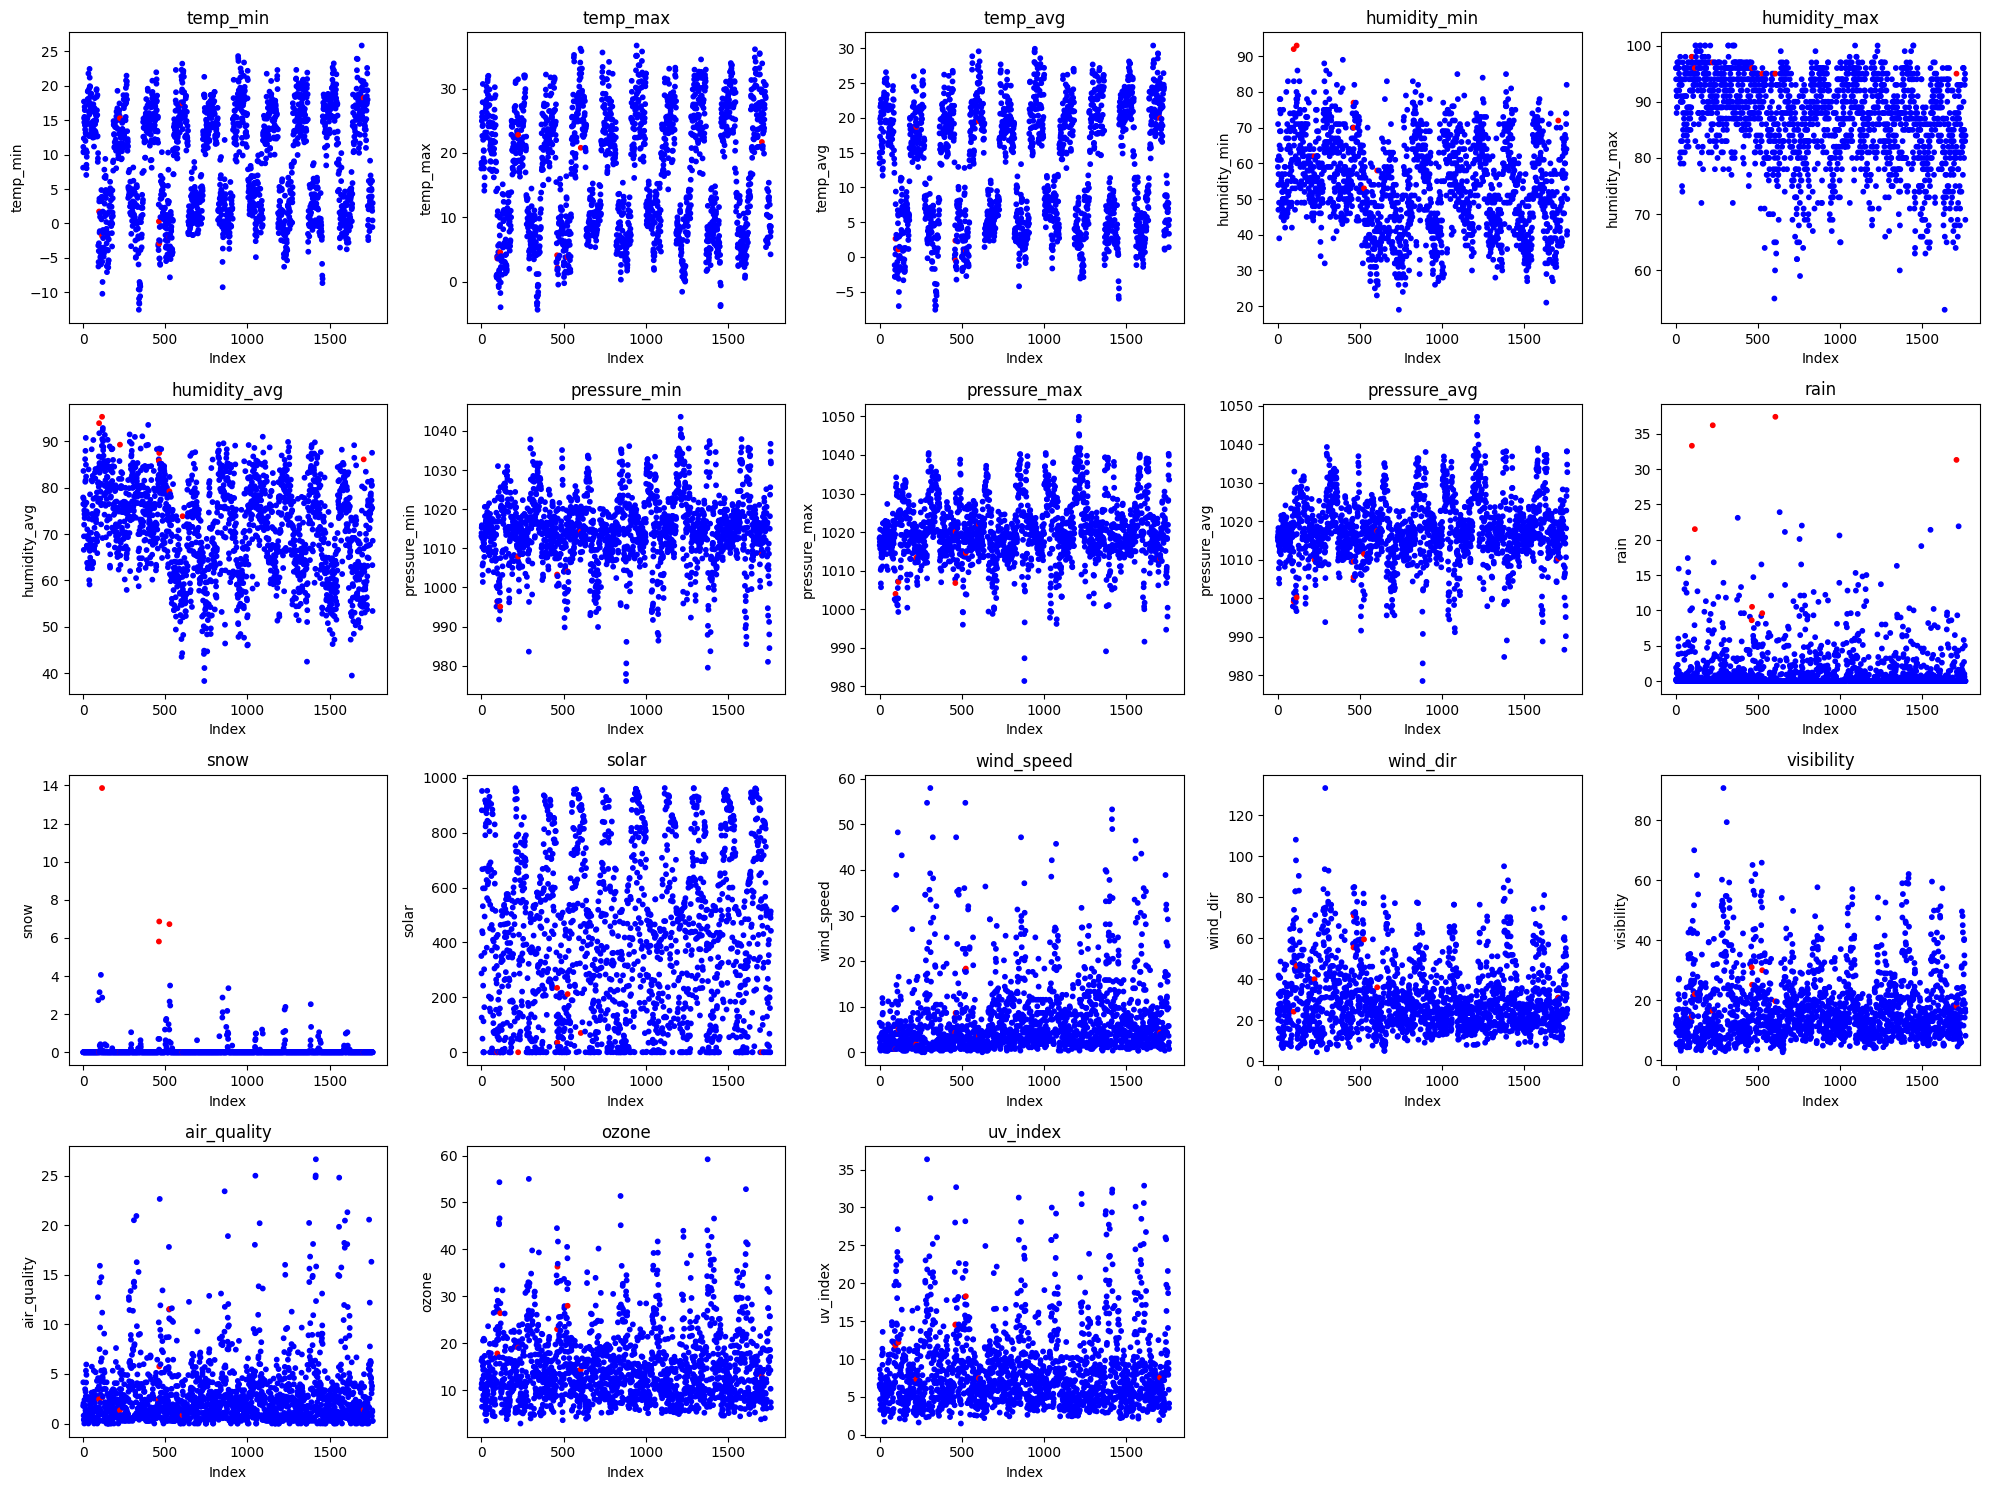

In [72]:
# define k 
k = 8

# get mean and standard deviation
mean = df.mean()
stdev = df.std()

# calculate zscores. These are the number of standard deviations away from the mean a data point lies.
z_scores = np.abs((df - mean) / stdev)

# if a row has any of these, mark as an outlier.
outliers = (z_scores > k).any(axis=1)


plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 5, i + 1)
    plt.scatter(df.index, df[column], c=outliers.map({True: 'red', False: 'blue'}), s=10)
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

After looking through these outliers manually, all of these seem normal. And do not seem like erroneous values that need to be removed. 
In a weather system especially, outliers or extreme weather events are events of extreme importance and the largest amount of interest. so unless there is a faulty reading, there is no need to remove data.

Min max columns are going to be removed, to reduce multicolinearity and dimensionality.
We will create range features to improve this

In [73]:
df['temp_range']        =  df['temp_max']      - df['temp_min']
df['humidity_range']    =  df['humidity_max']  - df['humidity_min']
df['pressure_range']    =  df['pressure_max']  - df['pressure_min']


df = df.drop(columns=['temp_min','temp_max', 'humidity_min', 'humidity_max', 'pressure_max', 'pressure_min'])

### Standardization.
Next we are going to perform standardisation. This is done in order to normalise all features to a mean zero and a variance of 1. We do this as it ensures that features with differnt scales do not overpower each other.

In [74]:

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
print(df_scaled.describe())

           temp_avg  humidity_avg  pressure_avg          rain         snow  \
count  1.763000e+03  1.763000e+03  1.763000e+03  1.763000e+03  1763.000000   
mean   9.672732e-17  8.141216e-16  4.824275e-15  3.627274e-17     0.000000   
std    1.000284e+00  1.000284e+00  1.000284e+00  1.000284e+00     1.000284   
min   -2.315664e+00 -3.267666e+00 -4.725439e+00 -4.299240e-01    -0.132379   
25%   -9.137280e-01 -7.512659e-01 -5.245193e-01 -4.299240e-01    -0.132379   
50%    2.163763e-01  9.585963e-02 -7.516383e-02 -4.299240e-01    -0.132379   
75%    8.781015e-01  7.702299e-01  5.053186e-01 -8.664681e-02    -0.132379   
max    2.015438e+00  2.418691e+00  3.565168e+00  1.026888e+01    26.843682   

              solar    wind_speed      wind_dir    visibility   air_quality  \
count  1.763000e+03  1.763000e+03  1.763000e+03  1.763000e+03  1.763000e+03   
mean   5.642427e-17 -4.836366e-17 -2.256971e-16  4.030305e-18 -1.894243e-16   
std    1.000284e+00  1.000284e+00  1.000284e+00  1.000284e+0

### Correlation Analysis

We are now going to show the correlation matrix in order to understand redundancy in the dataset,

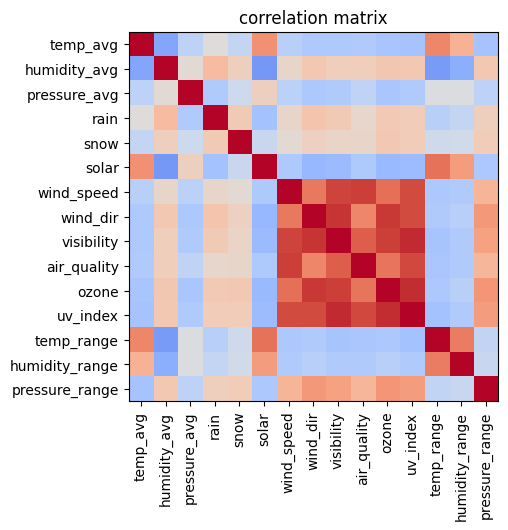

In [76]:
correlation_matrix = df_scaled.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='equal', vmin=-1, vmax=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=0)

plt.title("correlation matrix")
plt.show()

### Dimensionality Reduction: PCA

we are going to use pca to reduce dimensionality while retaining 0.95 of the variance in the data.
this has the following advantages:
- removes redundancy
- removes noise
- helps visualise highly dimensional data in 2 dimensions

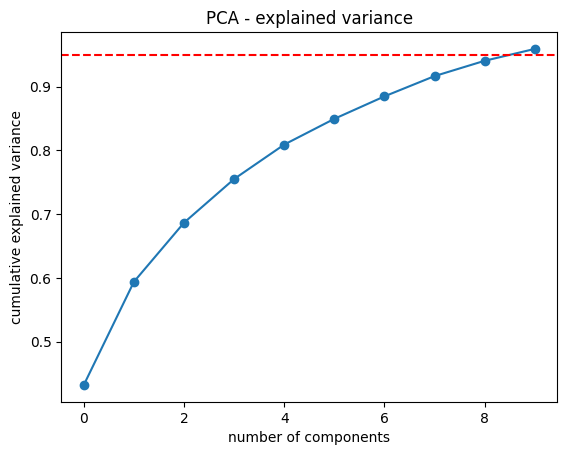

In [77]:
pca = PCA(n_components=0.95, random_state=67)
pca_x = pca.fit_transform(df_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.title('PCA - explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(pca_x, columns=pc_columns)



This shows us how many components we need to keep our 95%

### Selecting the best value for K

We are going to be doing this using 4 techniques:
- `Silhouette score`
- `Inertia`
- `Davies-Bouldin score`
- `Calinski-Harabasz plot`

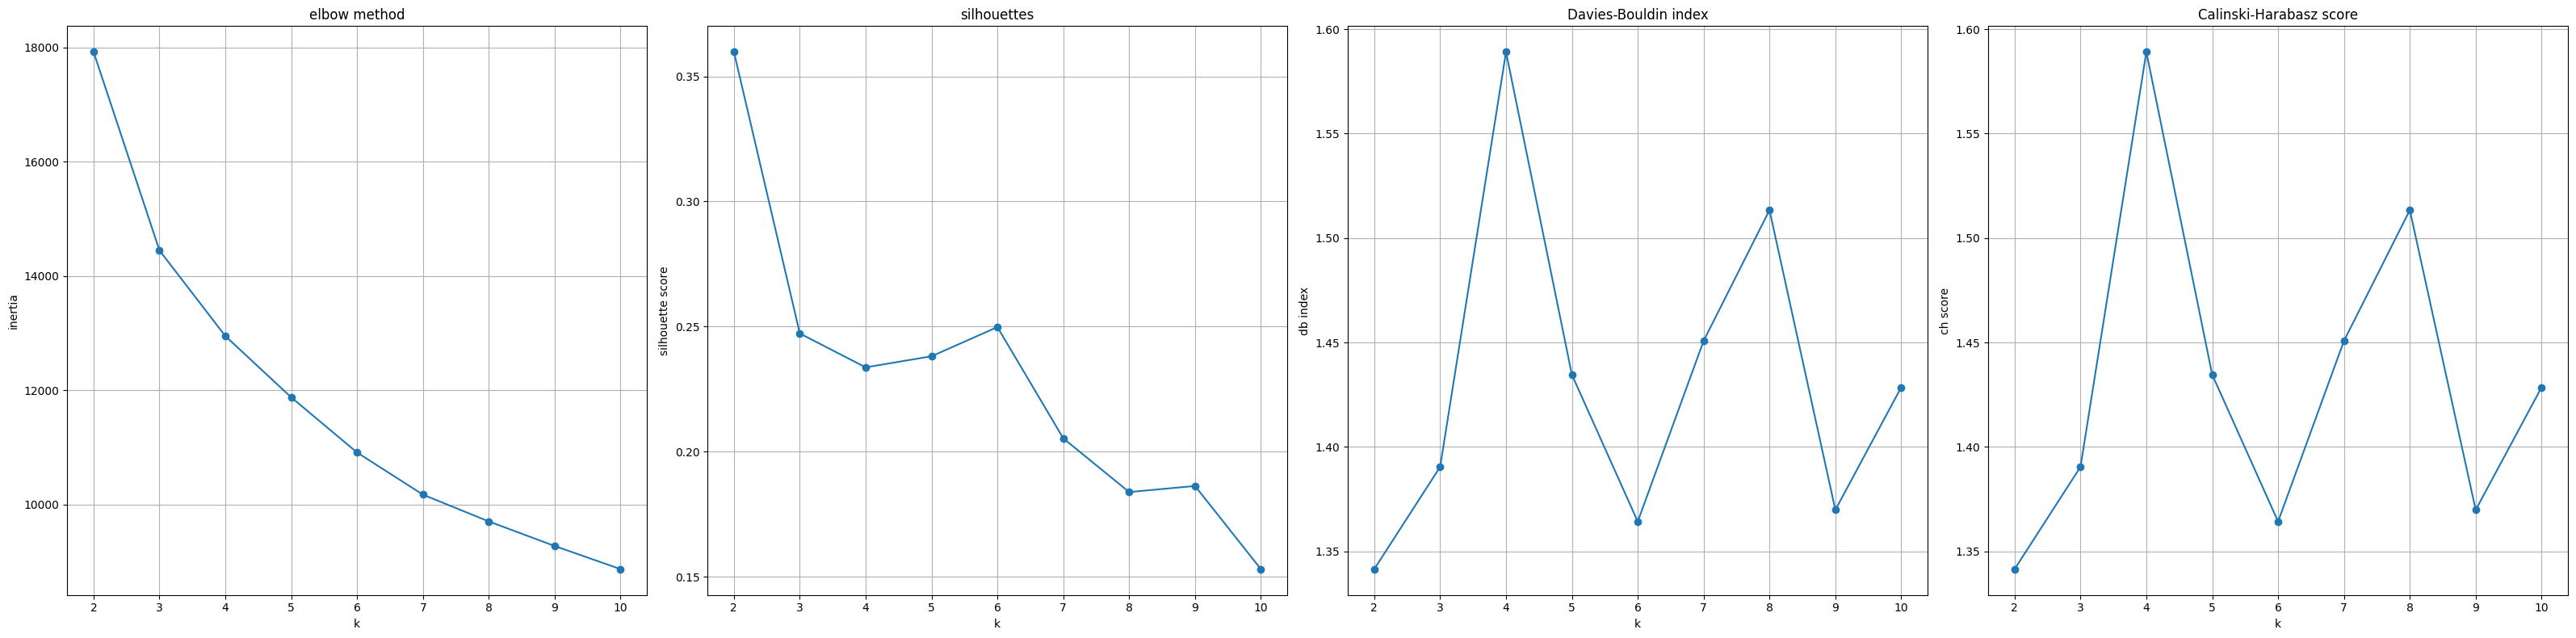

In [78]:

inertias = []
silhouettes = [] 
db_scores = [] 
ch_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 67, n_init=50, max_iter=1000)
    labels = kmeans.fit_predict(pca_x)

    # calculate scores for respective metrics
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(pca_x, labels))
    db_scores.append(davies_bouldin_score(pca_x, labels))
    ch_scores.append(calinski_harabasz_score(pca_x, labels))


fig, axes = plt.subplots(1, 4, figsize=(32, 8))

# elbow method using inertia
axes[0].plot(range(2,11), inertias, marker='o')
axes[0].grid(True)
axes[0].set_title("elbow method")
axes[0].set_xlabel("k")
axes[0].set_ylabel("inertia")

# silhouette
axes[1].plot(range(2,11), silhouettes, marker='o')
axes[1].grid(True)
axes[1].set_title("silhouettes")
axes[1].set_xlabel("k")
axes[1].set_ylabel("silhouette score")

#db index
axes[2].plot(range(2,11), db_scores, marker='o')
axes[2].grid(True)
axes[2].set_title("Davies-Bouldin index")
axes[2].set_xlabel("k")
axes[2].set_ylabel("db index")


# ch score
axes[3].grid(True)
axes[3].plot(range(2,11), db_scores, marker='o')
axes[3].set_title("Calinski-Harabasz score")
axes[3].set_xlabel("k")
axes[3].set_ylabel("ch score")

plt.tight_layout()
plt.show()


3 clusters seems to be the clear winner here as a compromise for all of these indeces.

### K-Means clustering
We are going to be doing k-means clustering first, using k=3 clusters.

In [79]:
kmeans = KMeans(n_clusters = 3, random_state = 67, n_init=50, max_iter=1000)
kmeans_labels = kmeans.fit_predict(pca_x)
print(f"Ran kmeans with k=3\nCluster sizes: {np.bincount(kmeans_labels)}")

Ran kmeans with k=3
Cluster sizes: [801 705 257]


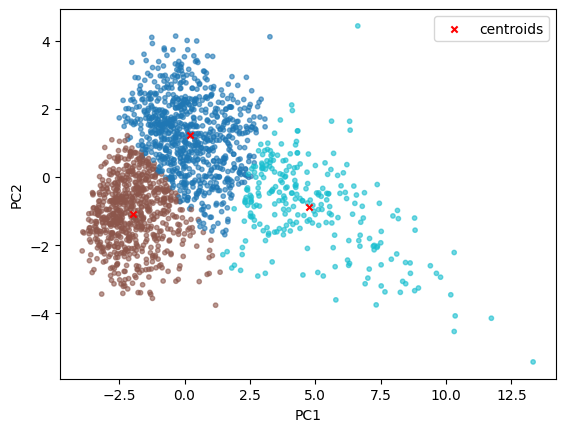

In [80]:
plt.figure()
plt.scatter(
    pca_x[:, 0], pca_x[:, 1],
    c=kmeans_labels,
    cmap='tab10',
    alpha=0.6,
    s=10
)

# scatter centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    s=20,
    marker='x',
    label='centroids'
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

### DBSCAN Clustering

We will now find the optimal epsilon using k-distance graph

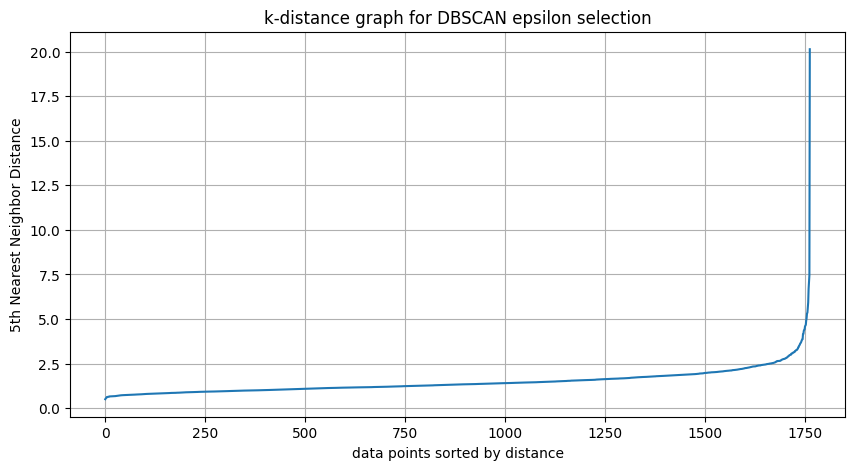

In [81]:
neighbours = NearestNeighbors(n_neighbors=5)
neighbours_fit = neighbours.fit(pca_x)

distances, indeces = neighbours_fit.kneighbors(pca_x)

# sort by distnace
distances = np.sort(distances[:,-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('data points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-distance graph for DBSCAN epsilon selection')
plt.grid(True)
plt.show()


As we can see on the graph, a value of between 1.5 and 3 would be ideal for epsilon. Lets test these.

In [82]:
eps_values = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
best_dbscan_score = -1

print("\nTesting DBSCAN with different eps values:")
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_db = dbscan.fit_predict(pca_x)
    
    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    n_noise = list(labels_db).count(-1)
    

    # only compute if there is more than 1 cluster generated
    if n_clusters > 1:
        mask = labels_db != -1
        if mask.sum() > 0:
            sil = silhouette_score(pca_x[mask], labels_db[mask])
            print(f"eps={eps}: clusters={n_clusters}, noise={n_noise}, silhouette={sil:.4f}")




Testing DBSCAN with different eps values:
eps=1.5: clusters=5, noise=458, silhouette=0.1809
eps=1.75: clusters=3, noise=271, silhouette=0.1846
eps=2: clusters=3, noise=155, silhouette=0.2742
eps=2.75: clusters=2, noise=35, silhouette=0.3928


We will graph and compare these later.
Now, we will move on to agglomerative clustering.

In [83]:
linkage_methods = ['ward', 'complete', 'average']
best_agg_score = -1
best_agg_params = None

print("\nTesting Agglomerative Clustering:")
for linkage_method in linkage_methods:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels_agg = agg.fit_predict(pca_x)
    
    sil = silhouette_score(pca_x, labels_agg)
    db = davies_bouldin_score(pca_x, labels_agg)
    
    print(f"Linkage={linkage_method}: silhouette={sil:.4f}, DB={db:.4f}")
    
    if sil > best_agg_score:
        best_agg_score = sil
        best_agg_params = {'linkage': linkage_method, 'labels': labels_agg, 'sil': sil, 'db': db}

print(f"\nBest Agglomerative: {best_agg_params['linkage']}, silhouette={best_agg_params['sil']:.4f}")


Testing Agglomerative Clustering:
Linkage=ward: silhouette=0.2064, DB=1.3237
Linkage=complete: silhouette=0.5386, DB=0.4822
Linkage=average: silhouette=0.5662, DB=0.6343

Best Agglomerative: average, silhouette=0.5662


### Comparison of clusters

Now its time to compare the 3 clusters together. We will do this first by visually inspecting, and then by using measurable metrics in order to compare the performace of these models.

kmeans

Silhouette:0.24724953867707844
Davies-Bouldin Score:1.3904167272408035
Calinski-Harabasz Score:665.2102363658269

dbscan
Silhouette:0.22611350098317445
Davies-Bouldin Score:1.4752908287818682
Calinski-Harabasz Score:125.69658456294692

agglomerative
Silhouette:0.3482756316916853
Davies-Bouldin Score:0.8479249106305868
Calinski-Harabasz Score:84.99261138227321


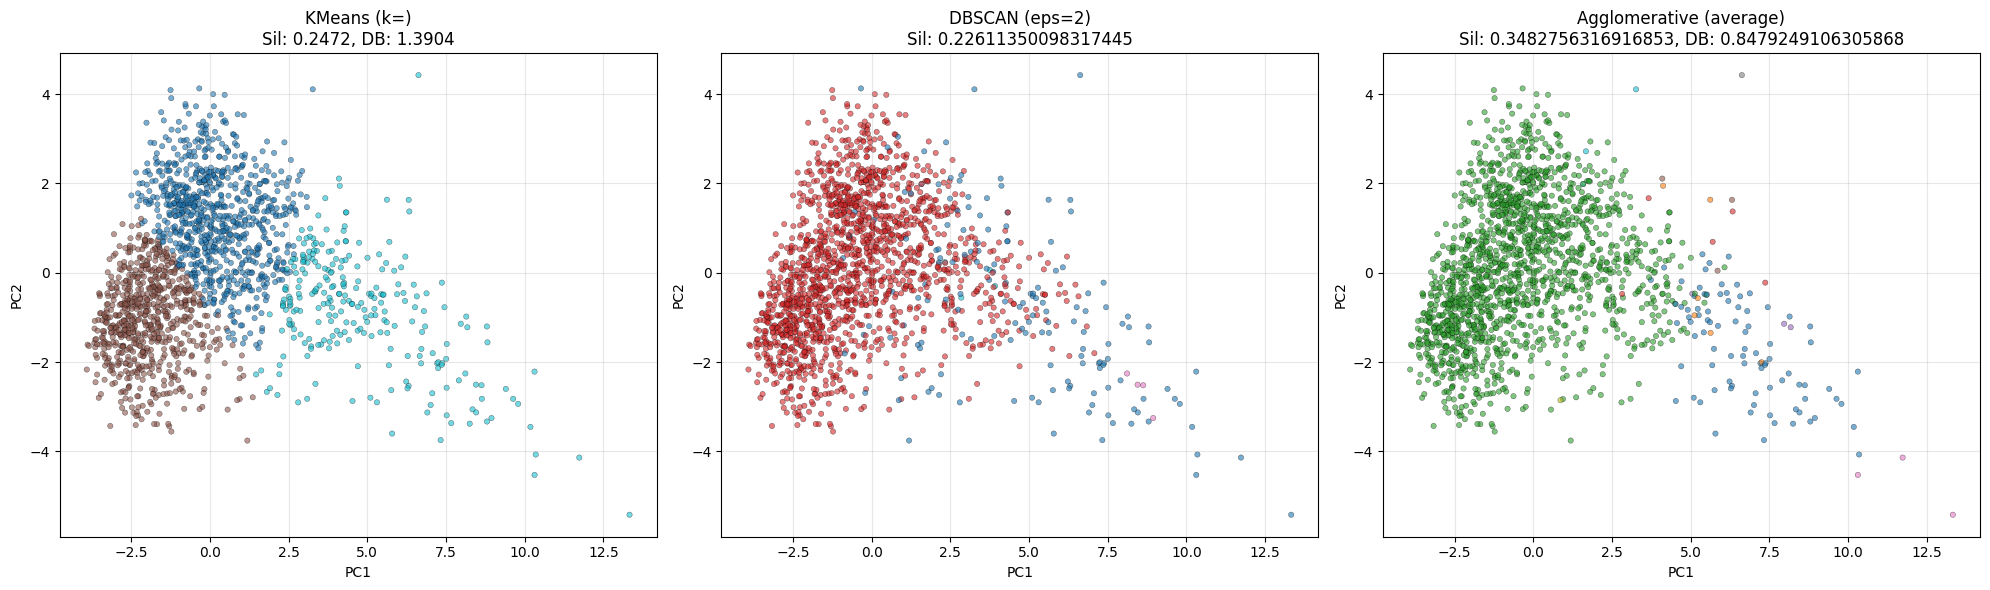

In [84]:


# calculate metrics for all clustering methods

#kmeans

kmeans_silhouette = silhouette_score(pca_x, kmeans_labels)
kmeans_db = davies_bouldin_score(pca_x, kmeans_labels)
kmeans_ch = calinski_harabasz_score(pca_x, kmeans_labels)

print(f"kmeans\n\nSilhouette:{kmeans_silhouette}\nDavies-Bouldin Score:{kmeans_db}\nCalinski-Harabasz Score:{kmeans_ch}\n")


#dbscan
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_x)
dbscan_silhouette = silhouette_score(pca_x, dbscan_labels)
dbscan_db = davies_bouldin_score(pca_x, dbscan_labels)
dbscan_ch = calinski_harabasz_score(pca_x, dbscan_labels)

print(f"dbscan\nSilhouette:{dbscan_silhouette}\nDavies-Bouldin Score:{dbscan_db}\nCalinski-Harabasz Score:{dbscan_ch}\n")



#agglomerative

agg_cluster = AgglomerativeClustering(n_clusters=k, linkage='average')
agg_labels = agg_cluster.fit_predict(pca_x)

agg_silhouette = silhouette_score(pca_x, agg_labels)
agg_db= davies_bouldin_score(pca_x, agg_labels)
agg_ch = calinski_harabasz_score(pca_x, agg_labels)

print(f"agglomerative\nSilhouette:{agg_silhouette}\nDavies-Bouldin Score:{agg_db}\nCalinski-Harabasz Score:{agg_ch}")


fig, axes = plt.subplots(1, 3, figsize=(20, 6))


# KMeans
axes[0].scatter(pca_x[:, 0], pca_x[:, 1], c=kmeans_labels, 
                cmap='tab10', s=15, alpha=0.6, edgecolors='k', linewidth=0.3)
axes[0].set_title(f'KMeans (k=)\nSil: {kmeans_silhouette:.4f}, DB: {kmeans_db:.4f}')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# DBSCAN

axes[1].scatter(pca_x[:, 0], pca_x[:, 1], c=dbscan_labels, 
                cmap='tab10', s=15, alpha=0.6, edgecolors='k', linewidth=0.3)
axes[1].set_title(f'DBSCAN (eps=2)\nSil: {dbscan_silhouette}')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, alpha=0.3)


# Agglomerative
axes[2].scatter(pca_x[:, 0], pca_x[:, 1], c=agg_labels, 
                cmap='tab10', s=15, alpha=0.6, edgecolors='k', linewidth=0.3)
axes[2].set_title(f'Agglomerative (average)\nSil: {agg_silhouette}, DB: {agg_db}')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Now to visualise these in UMAP.

/home/b/uni/SCC403-data-mining/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


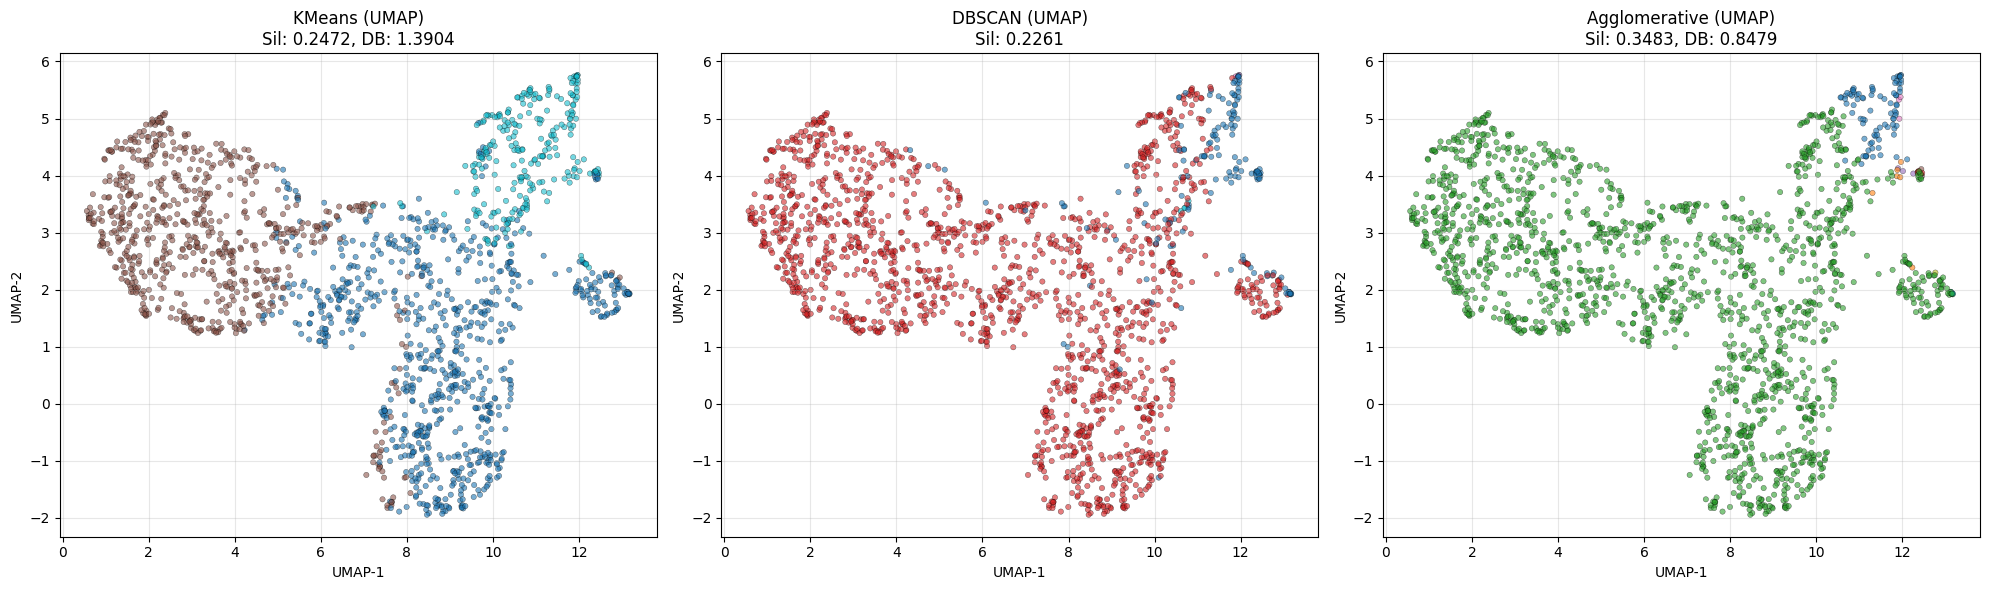

In [85]:
import umap.umap_ as umap

# compute umap (2D)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_x = umap_model.fit_transform(pca_x)   # or raw X, but stick to pca_x for consistency


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# KMeans UMAP
axes[0].scatter(umap_x[:, 0], umap_x[:, 1],
                c=kmeans_labels, cmap='tab10', s=15, alpha=0.6,
                edgecolors='k', linewidth=0.3)
axes[0].set_title(f'KMeans (UMAP)\nSil: {kmeans_silhouette:.4f}, DB: {kmeans_db:.4f}')
axes[0].set_xlabel('UMAP-1')
axes[0].set_ylabel('UMAP-2')
axes[0].grid(True, alpha=0.3)

# DBSCAN UMAP
axes[1].scatter(umap_x[:, 0], umap_x[:, 1],
                c=dbscan_labels, cmap='tab10', s=15, alpha=0.6,
                edgecolors='k', linewidth=0.3)
axes[1].set_title(f'DBSCAN (UMAP)\nSil: {dbscan_silhouette:.4f}')
axes[1].set_xlabel('UMAP-1')
axes[1].set_ylabel('UMAP-2')
axes[1].grid(True, alpha=0.3)

# Agglomerative UMAP
axes[2].scatter(umap_x[:, 0], umap_x[:, 1],
                c=agg_labels, cmap='tab10', s=15, alpha=0.6,
                edgecolors='k', linewidth=0.3)
axes[2].set_title(f'Agglomerative (UMAP)\nSil: {agg_silhouette:.4f}, DB: {agg_db:.4f}')
axes[2].set_xlabel('UMAP-1')
axes[2].set_ylabel('UMAP-2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
